# Text Normalization and Pre-processing Pipelines

>### Today
>
>- [A Standard*-ish* NLP Pipeline](#A-Standard-ish-NLP-Pipeline)
>
>
>- [Sentence Segmentation](#Sentence-Segmentation)
>
>
>- [Tokenization](#Tokenization)
>
>
>- [Stemming and Lemmatization](#Stemming-and-Lemmatization)
>
>
>- [PoS Tagging](#PoS-Tagging)

---

## A Standard*-ish* NLP Pipeline

![alt text](https://github.com/bloemj/AUC_TMCI_2022/blob/main/notebooks/images/pipeline.png?raw=1)

---

### What we hope to get as the final result...

Go on the Stanford CoreNLP [online demo](http://corenlp.run/) and parse the following sentence:

> I think there is a world market for maybe five computers.

(allegedly said by Thomas J. Watson, CEO of IBM, in 1943)

This might be useful: [list of Penn Treebank POS tags.](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

---

### A Few Recommendations

#### [NLTK](http://www.nltk.org/) (Python)


- has a variety of ready/easy-to-use implementations in several languages (some tools available for Dutch as well)


- has a variety of APIs for other packages (e.g. Stanford CoreNLP)


- lacks Information Extraction features (e.g. coreference resolution, relation extraction)


- several implementations are not state-of-the-art and/or are rather slow

#### [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/) (Java)


- includes virtually any NLP tool


- basic distribution for English, but models for the following languages are available: Arabic, Chinese, French, German, and Spanish


- implementations are often State-of-the-Art (though some component may not be the most efficient)


- has Python wrappers


- needs a bit more technical skills than using NLTK

#### [spaCy](https://spacy.io) (Python)


- industry-ready: scale, performance, getting things done, lacks some flexibility


- many models for many languages: English German French Spanish Portuguese Italian Dutch Greek


- implementations are often State-of-the-Art


- has Python wrappers and the very clean "spaCy pipeline" programming interface 


- comes with many machine learning pre-trained models

#### [pattern](https://www.clips.uantwerpen.be/clips.bak/pages/pattern-nl) (NL-EN/Python)


- toolbox for Dutch


- easy to use


- contains modules for PoS tagging, sentiment analysis and a WordNet interface


- many interesting datasets available


- available for [English](https://www.clips.uantwerpen.be/pages/pattern-en) as well

When to use what? Chose by yourself: https://spacy.io/usage/facts-figures

---

### Task-dependent choces

#### A note on terminology:

* **Type** = abstract ideal form of a sequence of characters (not necessarily a word in a language!)
* **Token** = instantiation of a type in our corpus or document

For example: *to be or not to be.*

* 6 tokens (to, be, or, not, to, be)
* 4 types (to, be, or, not)

The types coincide with the vocabulary.

Note that not all types might be proper words nor have a related lemma in an external lexicon.

#### Cleaning

- remove lists, tables, figure captions, page headers, etc.



- text from XML/HTML: remove unwanted code (e.g. head elements, boilerplates, comments, javascript code).



- text from PDF: remove noisy characters


- OCR errors are systematic: e.g. an "`m`" recognized as a "`rn`", an "`e`" as a "`c`", an "`l`" as a "`1`", an "`f`" recognized as a "`s`".


#### Normalization and filtering

Reducing the valid vocabulary space or even the text itself by filtering or standardizing. Standardizing might be considered as the task of creating equivalence classes of types. These decisions are application-dependent, might come from trial and error but should motivated in principle.

- lowercasing and abbreviations. If you want "`Train`" and "`train`" to be counted as token of the same type, you should "`lower()`" the text, however case-folding may remove disciminative information, e.g., "`U.S.`" "`US`" vs. "`us`".


- Hyphenation, accents, ... ("`text-minig`", "`textmining`", "`text mining`"; "`cliche`", "`cliché`")


- Punctuation, digits, misspells, ...


- Very frequent or very rare words.


- Stopwords (usually, these are very frequent words!).


- Specialized portions of the text (e.g., footnotes).


- Normalization can also be done via relations, e.g. considering "`car`" and "`automobile`" as synonyms. We can use WordNet for that. 

In [ ]:
import nltk
from nltk.corpus import stopwords
", ".join(set(stopwords.words('french')))

'des, c, y, l, as, ayantes, eusses, étais, soyons, ces, êtes, ta, aurez, eûmes, pour, vous, soit, eux, sa, fûmes, lui, eussent, du, fussent, ait, m, te, seriez, auraient, eûtes, t, eurent, est, notre, serai, aux, sois, par, furent, je, eue, ils, à, fus, fussiez, eût, on, serais, auriez, se, sera, un, auront, avons, serait, eus, ayons, mon, eusse, pas, le, avez, sommes, étantes, ce, étés, aviez, il, de, fut, nous, son, ne, eussions, eues, eussiez, aient, d, auras, ma, nos, seras, que, même, au, fusse, ont, n, étiez, aurai, étante, la, mais, serez, fût, aurait, j, avions, eut, serons, aie, s, avaient, ai, serions, soyez, et, ayante, était, étants, ses, ayants, aies, tes, leur, seront, suis, les, aurons, ton, dans, qu, elle, me, ayant, sont, avec, fussions, avais, une, aura, aurais, toi, fûtes, tu, étées, mes, es, fusses, avait, ayez, moi, été, sur, étant, étions, qui, seraient, vos, étaient, soient, votre, ou, eu, étée, en, aurions'

---

## Sentence Segmentation

In its base form, a text is a stream of characters. 


In [ ]:
import nltk

You might need to install NLTK packages and corpora, a good idea is to install all the *Popular* ones.

In [ ]:
# this launches a pop-up window to install the NLTK packages and corpora you will need

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
print(text[:1010])

[The Man Who Was Thursday by G. K. Chesterton 1908]

To Edmund Clerihew Bentley

A cloud was on the mind of men, and wailing went the weather,
Yea, a sick cloud upon the soul when we were boys together.
Science announced nonentity and art admired decay;
The world was old and ended: but you and I were gay;
Round us in antic order their crippled vices came--
Lust that had lost its laughter, fear that had lost its shame.
Like the white lock of Whistler, that lit our aimless gloom,
Men showed their own white feather as proudly as a plume.
Life was a fly that faded, and death a drone that stung;
The world was very old indeed when you and I were young.
They twisted even decent sin to shapes not to be named:
Men were ashamed of honour; but we were not ashamed.
Weak if we were and foolish, not thus we failed, not thus;
When that black Baal blocked the heavens he had no hymns from us
Children we were--our forts of sand were even as weak as eve,
High as they went we piled them up to break that b

In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giovannicolavizza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The first NLP processing step is **the identification of the sentence boundaries**:

- some pipelines perform the sentence splitting phase before the tokenization (e.g., NLTK)


- while other uses information about the tokens (e.g., CoreNLP) and/or about the parse tree (e.g., spaCy) to identify sentence boundaries

In [ ]:
# getting rid of newlines
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt').replace("\n", " ") 

# the NLTK corpus sents() returns the tokenized words as well 
for sentence in nltk.corpus.gutenberg.sents('chesterton-thursday.txt')[:8]:
    print(" ".join(sentence))

[ The Man Who Was Thursday by G . K . Chesterton 1908 ]
To Edmund Clerihew Bentley
A cloud was on the mind of men , and wailing went the weather , Yea , a sick cloud upon the soul when we were boys together .
Science announced nonentity and art admired decay ; The world was old and ended : but you and I were gay ; Round us in antic order their crippled vices came -- Lust that had lost its laughter , fear that had lost its shame .
Like the white lock of Whistler , that lit our aimless gloom , Men showed their own white feather as proudly as a plume .
Life was a fly that faded , and death a drone that stung ; The world was very old indeed when you and I were young .
They twisted even decent sin to shapes not to be named : Men were ashamed of honour ; but we were not ashamed .
Weak if we were and foolish , not thus we failed , not thus ; When that black Baal blocked the heavens he had no hymns from us Children we were -- our forts of sand were even as weak as eve , High as they went we pi

 ... but **what is a sentence?**
 
 - something ending with "`.`", "`!`" or "`?`", maybe?

In [ ]:
import re
re.split(r"[.?!]", text[:200])

['[The Man Who Was Thursday by G',
 ' K',
 ' Chesterton 1908]\n\nTo Edmund Clerihew Bentley\n\nA cloud was on the mind of men, and wailing went the weather,\nYea, a sick cloud upon the soul when we were boys togethe']

In [ ]:
print(text[:200])

[The Man Who Was Thursday by G. K. Chesterton 1908]

To Edmund Clerihew Bentley

A cloud was on the mind of men, and wailing went the weather,
Yea, a sick cloud upon the soul when we were boys togethe


Not really, a period can be used also to denote:

- an abbreviation (47% of the periods in the Wall Street Journal denote abbreviations)

- decimal point

- ellipsis

- url or e-mail address...

Question marks and exclamation marks can be used in:

- emoticons and slang

- computer code 

- embedded quotations...

Even if heuristic solutions are conceivable (e.g. CoreNLP)...

- e.g. *a period is not a sentence boundary if the preceding token is title-cased*

...the best option is to treat the sentence boundary identification as a **binary classification problem** (e.g. NLTK), in which possible features can be:

- case of the surrounding tokens


- length of the surrounding tokens


- lemma/type/form of the surrounding tokens

In [ ]:
for i in nltk.tokenize.sent_tokenize(text[:1010]):
    print(i+"\n")

[The Man Who Was Thursday by G. K. Chesterton 1908]

To Edmund Clerihew Bentley

A cloud was on the mind of men, and wailing went the weather,
Yea, a sick cloud upon the soul when we were boys together.

Science announced nonentity and art admired decay;
The world was old and ended: but you and I were gay;
Round us in antic order their crippled vices came--
Lust that had lost its laughter, fear that had lost its shame.

Like the white lock of Whistler, that lit our aimless gloom,
Men showed their own white feather as proudly as a plume.

Life was a fly that faded, and death a drone that stung;
The world was very old indeed when you and I were young.

They twisted even decent sin to shapes not to be named:
Men were ashamed of honour; but we were not ashamed.

Weak if we were and foolish, not thus we failed, not thus;
When that black Baal blocked the heavens he had no hymns from us
Children we were--our forts of sand were even as weak as eve,
High as they went we piled them up to break t

The accuracy of these classifiers can be as high as over 99%

NLTK come packed with classifiers trained on 17 languages, among which Dutch:

- there are methods that allows you to train your own models as well. This can be useful if you want to process special texts like tweets or facebook messages...

In [ ]:
a_dutch_email = """Uw abonnement op uw OV-chipkaart activeren.
Het is belangrijk dat u het abonnement op uw OV-chipkaart activeert.
Dit kunt u doen bij de NS-kaartautomaat of bij één van de overige ophaalpunten voor de OV-chipkaart. Kijk voor een overzicht van de ophaalpunten op www.ov-chipkaart.nl/adresvinder.
Hoe activeert u uw abonnement bij de NS-kaartautomaat?
Houd uw OV-chipkaart voor de kaartlezer rechts onder het scherm.
Kies 'Ophalen bestelling' en volg de aanwijzingen op het scherm.
Voordat u aan uw reis begint dient er minimaal €10,- saldo op uw OV-chipkaart te staan.
Vergeet niet in en uit te checken tijdens uw reis.
Heeft u nog vragen?
We helpen u graag verder. Kijk op www.ns.nl of stel uw vraag op het NS Serviceforum (www.ns.nl/forum). U kunt ook contact opnemen met NS Klantenservice via telefoonnummer 030 - 751 51 55 of via Twitter @NS_online. We staan dag en nacht voor u klaar.
"""

In [ ]:
nltk.tokenize.sent_tokenize(a_dutch_email, language='dutch')

['Uw abonnement op uw OV-chipkaart activeren.',
 'Het is belangrijk dat u het abonnement op uw OV-chipkaart activeert.',
 'Dit kunt u doen bij de NS-kaartautomaat of bij één van de overige ophaalpunten voor de OV-chipkaart.',
 'Kijk voor een overzicht van de ophaalpunten op www.ov-chipkaart.nl/adresvinder.',
 'Hoe activeert u uw abonnement bij de NS-kaartautomaat?',
 'Houd uw OV-chipkaart voor de kaartlezer rechts onder het scherm.',
 "Kies 'Ophalen bestelling' en volg de aanwijzingen op het scherm.",
 'Voordat u aan uw reis begint dient er minimaal €10,- saldo op uw OV-chipkaart te staan.',
 'Vergeet niet in en uit te checken tijdens uw reis.',
 'Heeft u nog vragen?',
 'We helpen u graag verder.',
 'Kijk op www.ns.nl of stel uw vraag op het NS Serviceforum (www.ns.nl/forum).',
 'U kunt ook contact opnemen met NS Klantenservice via telefoonnummer 030 - 751 51 55 of via Twitter @NS_online.',
 'We staan dag en nacht voor u klaar.']

---

## Tokenization

Tokenization is the task of splitting a string of characters into chunks of characters.

It is a task that is usually tackled with rule-based or regex-based algorithms.

In [ ]:
# it can be performed BEFORE sentence splitting
print(nltk.corpus.gutenberg.words('chesterton-thursday.txt')[:226])

['[', 'The', 'Man', 'Who', 'Was', 'Thursday', 'by', 'G', '.', 'K', '.', 'Chesterton', '1908', ']', 'To', 'Edmund', 'Clerihew', 'Bentley', 'A', 'cloud', 'was', 'on', 'the', 'mind', 'of', 'men', ',', 'and', 'wailing', 'went', 'the', 'weather', ',', 'Yea', ',', 'a', 'sick', 'cloud', 'upon', 'the', 'soul', 'when', 'we', 'were', 'boys', 'together', '.', 'Science', 'announced', 'nonentity', 'and', 'art', 'admired', 'decay', ';', 'The', 'world', 'was', 'old', 'and', 'ended', ':', 'but', 'you', 'and', 'I', 'were', 'gay', ';', 'Round', 'us', 'in', 'antic', 'order', 'their', 'crippled', 'vices', 'came', '--', 'Lust', 'that', 'had', 'lost', 'its', 'laughter', ',', 'fear', 'that', 'had', 'lost', 'its', 'shame', '.', 'Like', 'the', 'white', 'lock', 'of', 'Whistler', ',', 'that', 'lit', 'our', 'aimless', 'gloom', ',', 'Men', 'showed', 'their', 'own', 'white', 'feather', 'as', 'proudly', 'as', 'a', 'plume', '.', 'Life', 'was', 'a', 'fly', 'that', 'faded', ',', 'and', 'death', 'a', 'drone', 'that', 's

In [ ]:
# it can be performed AFTER sentence splitting
for s in nltk.corpus.gutenberg.sents('chesterton-thursday.txt')[:8]:
    print(s)

['[', 'The', 'Man', 'Who', 'Was', 'Thursday', 'by', 'G', '.', 'K', '.', 'Chesterton', '1908', ']']
['To', 'Edmund', 'Clerihew', 'Bentley']
['A', 'cloud', 'was', 'on', 'the', 'mind', 'of', 'men', ',', 'and', 'wailing', 'went', 'the', 'weather', ',', 'Yea', ',', 'a', 'sick', 'cloud', 'upon', 'the', 'soul', 'when', 'we', 'were', 'boys', 'together', '.']
['Science', 'announced', 'nonentity', 'and', 'art', 'admired', 'decay', ';', 'The', 'world', 'was', 'old', 'and', 'ended', ':', 'but', 'you', 'and', 'I', 'were', 'gay', ';', 'Round', 'us', 'in', 'antic', 'order', 'their', 'crippled', 'vices', 'came', '--', 'Lust', 'that', 'had', 'lost', 'its', 'laughter', ',', 'fear', 'that', 'had', 'lost', 'its', 'shame', '.']
['Like', 'the', 'white', 'lock', 'of', 'Whistler', ',', 'that', 'lit', 'our', 'aimless', 'gloom', ',', 'Men', 'showed', 'their', 'own', 'white', 'feather', 'as', 'proudly', 'as', 'a', 'plume', '.']
['Life', 'was', 'a', 'fly', 'that', 'faded', ',', 'and', 'death', 'a', 'drone', 'that

Some of the most recurrent issues with **Tokenization in English**:

- contractions: *I'm*, *isn't*, *Gianluca's*


- emoticons: *:)*, *;-)*


- proper names: *J.K. Rowling*, *F.B.I.*, *O'Neill*


- hyphenation can be used in many ways:

    - single word: *e-mail*, *co-operation*
    - how many words? *so-called*, *pro-gun*
    - grouping of words for non-strictly-linguistic purposes: *take-it-or-leave*



- multi word expressions and collocations:

    - phrasal verbs: *give up*, *work out*, *move in*
    - multi-token proper names: *New York*, *Las Vegas*
    - compound nominals: *car park*, *attorney general*, *part of speech*
    - ...

The complexity of this task is also **language-dependent**:

- e.g. compounds in German: *Donaudampfschifffahrtselektrizitätenhauptbetriebswerkbauunterbeamtengesellschaft* (i.e. "Association for subordinate officials of the head office management of the Danube steamboat electrical services")


- Chinese is written without spaces between words: 天花 ("small pot") vs. 天 ("sky") and 花 ("flower").

Simplest (but suboptimal) solution: **segment around space characters**

In [ ]:
print(text[:1000].split())

['[The', 'Man', 'Who', 'Was', 'Thursday', 'by', 'G.', 'K.', 'Chesterton', '1908]', 'To', 'Edmund', 'Clerihew', 'Bentley', 'A', 'cloud', 'was', 'on', 'the', 'mind', 'of', 'men,', 'and', 'wailing', 'went', 'the', 'weather,', 'Yea,', 'a', 'sick', 'cloud', 'upon', 'the', 'soul', 'when', 'we', 'were', 'boys', 'together.', 'Science', 'announced', 'nonentity', 'and', 'art', 'admired', 'decay;', 'The', 'world', 'was', 'old', 'and', 'ended:', 'but', 'you', 'and', 'I', 'were', 'gay;', 'Round', 'us', 'in', 'antic', 'order', 'their', 'crippled', 'vices', 'came--', 'Lust', 'that', 'had', 'lost', 'its', 'laughter,', 'fear', 'that', 'had', 'lost', 'its', 'shame.', 'Like', 'the', 'white', 'lock', 'of', 'Whistler,', 'that', 'lit', 'our', 'aimless', 'gloom,', 'Men', 'showed', 'their', 'own', 'white', 'feather', 'as', 'proudly', 'as', 'a', 'plume.', 'Life', 'was', 'a', 'fly', 'that', 'faded,', 'and', 'death', 'a', 'drone', 'that', 'stung;', 'The', 'world', 'was', 'very', 'old', 'indeed', 'when', 'you', '

There are many issues with this solution, among which the production of tokens such as `'plume.'`, `'thus;'` and `'were--our'`

NLTK's recommended word tokenizer is the Penn `nltk.tokenize.TreebankWordTokenizer().tokenize()`, that can be called in many ways, among which the easier is by using the `nltk.tokenize.word_tokenize()` wrapper:

In [ ]:
# this is the same as nltk.tokenize.TreebankWordTokenizer().tokenize(text[:1010])
print(nltk.tokenize.word_tokenize(text[:1000]))

['[', 'The', 'Man', 'Who', 'Was', 'Thursday', 'by', 'G.', 'K.', 'Chesterton', '1908', ']', 'To', 'Edmund', 'Clerihew', 'Bentley', 'A', 'cloud', 'was', 'on', 'the', 'mind', 'of', 'men', ',', 'and', 'wailing', 'went', 'the', 'weather', ',', 'Yea', ',', 'a', 'sick', 'cloud', 'upon', 'the', 'soul', 'when', 'we', 'were', 'boys', 'together', '.', 'Science', 'announced', 'nonentity', 'and', 'art', 'admired', 'decay', ';', 'The', 'world', 'was', 'old', 'and', 'ended', ':', 'but', 'you', 'and', 'I', 'were', 'gay', ';', 'Round', 'us', 'in', 'antic', 'order', 'their', 'crippled', 'vices', 'came', '--', 'Lust', 'that', 'had', 'lost', 'its', 'laughter', ',', 'fear', 'that', 'had', 'lost', 'its', 'shame', '.', 'Like', 'the', 'white', 'lock', 'of', 'Whistler', ',', 'that', 'lit', 'our', 'aimless', 'gloom', ',', 'Men', 'showed', 'their', 'own', 'white', 'feather', 'as', 'proudly', 'as', 'a', 'plume', '.', 'Life', 'was', 'a', 'fly', 'that', 'faded', ',', 'and', 'death', 'a', 'drone', 'that', 'stung', '

NLTK offers alternative word tokenizer, that may be more appropriate according to the applications you are developing

In [ ]:
nltk_text = 'That U.S.A. poster-print doesn\'t cost $12.40...'
print(nltk_text.split())

['That', 'U.S.A.', 'poster-print', "doesn't", 'cost', '$12.40...']


In [ ]:
nltk_text = 'That U.S.A. poster-print doesn\'t cost $12.40...'
print(nltk.tokenize.word_tokenize(nltk_text))

['That', 'U.S.A.', 'poster-print', 'does', "n't", 'cost', '$', '12.40', '...']


In [ ]:
# nltk.tokenize.wordpunct_tokenize splits all punctuations into separate tokens
print(nltk.tokenize.wordpunct_tokenize(nltk_text))

['That', 'U', '.', 'S', '.', 'A', '.', 'poster', '-', 'print', 'doesn', "'", 't', 'cost', '$', '12', '.', '40', '...']


In [ ]:
# nltk.regexp_tokenize() allows you to build a customized tokenizer by specifying a regex pattern
pattern = r'''(?x)    # set flag to allow verbose regexps
(?:[A-Z]\.)+          # abbreviations, e.g. U.S.A.
|\w+(?:-\w+)*         # words with optional internal hyphens
|\$?\d+(?:\.\d+)?%?   # currency and percentages, e.g. $12.40, 82%
|\.\.\.               # ellipsis
|[][.,;"\'?():-_`]    # these are separate tokens
'''

nltk.regexp_tokenize(nltk_text, pattern)

['That', 'U.S.A.', 'poster-print', 'doesn', "'", 't', 'cost', '$12.40', '...']

---

## Stemming and Lemmatization


The goal of both stemming and lemmatization is to reduce inflectional forms (e.g. *dreaming*, *dreamed*) and sometimes derivationally related forms of a word to a common "base form" (e.g. *eat*).

*Stemming targets the stem, or the part of a word which remains stable to inflectional manipulations. E.g., "eats" -> "eat".*

*Lemmatization targets the lemma, or the canonical dictionary key associated with the word. E.g., "is" -> "be".*

### Stemming

- Stemming in practice usually refers to a **crude heuristic** process that (usually) removes the inflectional **suffixes** of a word


- The result of stemming **might not be an actual word**


- Stemmers are very fast and do not require PoS information

NLTK offers several algorithms, among which the most used are: 

- the [Porter](https://tartarus.org/martin/PorterStemmer/) Stemmer: the oldest algorithm (1979), it is regex-based, it is still the most used even if more computationally intensive


- the algorithm consists of 5 phases of word reductions, applied sequentially as a cascade.


- Example of rules in phase 1:

    * SSES -> SS (*caresses -> caress*)
    * IES -> I (*ponies -> poni*)
    * S ->  (*cats -> cat*)


- Example of rules in phase 5 (measuring if a token could stand by itself):

    * EMENT ->  (would reduce *replacement* to *replac*, but leave *cement* as cement because "`c`" alone is too short)

In [ ]:
nltk.PorterStemmer().stem("unfriendliness")

'unfriendli'

In [ ]:
nltk.PorterStemmer().stem("cements")

'cement'

In [ ]:
nltk.PorterStemmer().stem("replace")

'replac'

- the [Lancaster](http://www.comp.lancs.ac.uk/computing/research/stemming/) Stemmers: the most aggressive

In [ ]:
# aggressive
nltk.LancasterStemmer().stem("unfriendliness")

'unfriend'

In [ ]:
nltk.LancasterStemmer().stem("cements")

'cem'

In [ ]:
# sometimes works better than the Porter Stemmer
print(nltk.PorterStemmer().stem("happiness"))
print(nltk.LancasterStemmer().stem("happiness"))
print(nltk.stem.snowball.SnowballStemmer("english").stem("happiness"))

happi
happy
happi


- [Snowball](http://snowballstem.org/) is a language for creating stemmers, and is available in many languages among which Dutch:

In [ ]:
print(nltk.stem.snowball.SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


> Wanna see a demo on how it works in dutch? Try `nltk.stem.snowball.demo()`

As a general rule, the SnowballStemmer for English (a.k.a. Porter2), works better than the original Porter stemmer

In [ ]:
print(nltk.PorterStemmer().stem("generously"))
print(nltk.stem.snowball.SnowballStemmer("english").stem("generously"))

gener
generous


### Lemmatization

Lemmatizers use a **vocabulary** and **morphological information** to apply a more articulated set of rules in order to return **actual lemmas** (a.k.a. dictionary entries)

The WordNet lemmatizer removes the affixes of a token only if the resulting lemma is in WordNet

- It is based on the WordNet `morphy` function

In [ ]:
# irregularities are easier to handle with a lemmatizer (if the word is in the vocabulary)
nltk.WordNetLemmatizer().lemmatize("women")

'woman'

In [ ]:
# but it doesn't really handle some inflected forms ...
nltk.WordNetLemmatizer().lemmatize("flying")

'flying'

In [ ]:
# ... but it is a PoS tagging issue, really. Let's tell it that we have the verb
nltk.WordNetLemmatizer().lemmatize("flying", pos = "v")

'fly'

### A quick-and-dirty comparison of Stemmers and the WN Lemmatizer

In [ ]:
words = ['caresses', 'flies', 'flying', 'mules', 'denied', 'agreed', 'humbled', 'sized',  'meeting', 'stating', 
         'itemization', 'sensational', 'traditional', 'reference', 'colonizer', 'provision', 'cement', 'women']

print("INPUT", "\t\t\t", "Porter", "\t", "Snowball", "\t", "Lancaster", "\t", "WN Lemmatizer")
print("-"*89)
for w in sorted(words):
    print(w+":  ", end='')
    for stemmer_function in [nltk.PorterStemmer().stem, nltk.stem.snowball.SnowballStemmer("english").stem, \
                             nltk.LancasterStemmer().stem, nltk.WordNetLemmatizer().lemmatize]:
        print("\t\t", stemmer_function(w), end='')
    print("")

INPUT 			 Porter 	 Snowball 	 Lancaster 	 WN Lemmatizer
-----------------------------------------------------------------------------------------
agreed:  		 agre		 agre		 agree		 agreed
caresses:  		 caress		 caress		 caress		 caress
cement:  		 cement		 cement		 cem		 cement
colonizer:  		 colon		 colon		 colon		 colonizer
denied:  		 deni		 deni		 deny		 denied
flies:  		 fli		 fli		 fli		 fly
flying:  		 fli		 fli		 fly		 flying
humbled:  		 humbl		 humbl		 humbl		 humbled
itemization:  		 item		 item		 item		 itemization
meeting:  		 meet		 meet		 meet		 meeting
mules:  		 mule		 mule		 mul		 mule
provision:  		 provis		 provis		 provid		 provision
reference:  		 refer		 refer		 ref		 reference
sensational:  		 sensat		 sensat		 sens		 sensational
sized:  		 size		 size		 siz		 sized
stating:  		 state		 state		 stat		 stating
traditional:  		 tradit		 tradit		 tradit		 traditional
women:  		 women		 women		 wom		 woman


#### How to choose?

As a rule of thumb:

- if you need to work with **real words**, use a lemmatizer (PoS information helps a lot)


- if you need **speed**, choose a stemmer


- if want to link morphological derivations (e.g. "dreamable") to their bases, a stemmer can be a quick-and-dirty solution

---

## PoS Tagging

The proccess of automatically classifying words into their **lexical categories** 

- lexical categories are also called words classes, parts-of-speech, lexical tags...

Lexical categories are divided into two main groups:

- **open word classes** which constantly acquire new members:
    - nouns, verbs, adjectives and adverbs


- **closed class** when their inventory does not change over time (or much less so):
    - e.g., pronouns, determiners, prepositions, conjunctions, auxiliary and modal verbs, numerals...

The collection of PoS tags used for a particular task is known as a **tagset**

- The most common English tagset is the [**Penn Treebank**](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) one, containing the following tags:

In [ ]:
# you might need to do this to download the related resource
#nltk.download('tagsets')
#nltk.download('universal_tagset')
#nltk.download('brown')

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

Some distinctions are quite **hard for both humans and machines** :

- preposition (IN), particle (RP) or adverb (RB)?
    - You'll never get *around*/RP to watching all those movies
    - Let's go *around*/IN the corner
    - It costs *around*/RB 500 bucks


- past participle (VBN) or adjective (JJ)?
    - What the teacher said, has *interested*/VBN the student
    - The student was *interested*/?? in what the teacher was saying
    - The *interested*/JJ student was listening to the teacher


- sometimes nouns can act like adjectives (i.e. they modify nouns):
    - *science* teacher
    - *government road accident research* centre

Insecure about a **specific tag**? Ask NLTK!

In [ ]:
nltk.help.upenn_tagset("JJ")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [ ]:
# a group of tags
nltk.help.upenn_tagset("NN*")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


**Other tagsets** are available in NLTK, e.g., the Brown corpus

In [ ]:
# Brown corpus tagset

nltk.help.brown_tagset("NN*")

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
NN$: noun, singular, common, genitive
    season's world's player's night's chapter's golf's football's
    baseball's club's U.'s coach's bride's bridegroom's board's county's
    firm's company's superintendent's mob's Navy's ...
NN+BEZ: noun, singular, common + verb 'to be', present tense, 3rd person singular
    water's camera's sky's kid's Pa's heat's throat's father's money's
    undersecretary's granite's level's wife's fat's Knife's fire's name's
    hell's leg's sun's roulette's cane's guy's kind's baseball's ...
NN+HVD: noun, singular, common + verb 'to have', past tense
    Pa'd
NN+HVZ: noun, singular, common + verb 'to have', present tense, 3rd person singular
    guy's Knife's boat's summer's rain's company's
NN+IN: noun, singular, common

### Using a Tagger

The `nltk.pos_tag()` method allows you to launch the default NLTK pos tagger model on a **tokenized text** (i.e. on a list of words):

In [ ]:
text = nltk.word_tokenize("And now for something completely different")
# text = nltk.word_tokenize("I'm going to my place.")
print(nltk.pos_tag(text))

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]


PoS-tagging requires a certain amount of disambiguation:

In [ ]:
# compare the two classifications of the type "refuse"
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
print(nltk.pos_tag(text))

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


The `nltk.pos_tag_sents()` method is recommened for efficient tagging of more than one sentence.

In [ ]:
print(nltk.pos_tag_sents([nltk.word_tokenize("And now for something completely different"),\
                          nltk.word_tokenize("They refuse to permit us to obtain the refuse permit"), ]))

[[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')], [('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]]


Other tagsets can be selected by using the `tagset` parameter. 

- For instance, to use the following **Universal tagset** proposed by [Petrov et al (2011)](https://arxiv.org/abs/1104.2086):

|  tag  | meaning |
|:-----:|:---------|
| VERB | verbs (all tenses and modes) |
| NOUN | nouns (common and proper) |
| PRON | pronouns |
| ADJ | adjectives |
| ADV | adverbs |
| ADP | adpositions (prepositions and postpositions) |
| CONJ | conjunctions |
| DET | determiners |
| NUM | cardinal numbers |
| PRT | particles or other function words |
| X | other: foreign words, typos, abbreviations |
| \. | punctuation |

In [ ]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
print(nltk.pos_tag(text, tagset="universal"))

[('They', 'PRON'), ('refuse', 'VERB'), ('to', 'PRT'), ('permit', 'VERB'), ('us', 'PRON'), ('to', 'PRT'), ('obtain', 'VERB'), ('the', 'DET'), ('refuse', 'NOUN'), ('permit', 'NOUN')]


#### Available Taggers

The default pos tagger model used by NLTK is the [Perceptron](https://github.com/sloria/textblob-aptagger) tagger. 

NLTK provides other pos taggers among which:

- the [TnT](http://www.coli.uni-saarland.de/~thorsten/tnt/) tagger: `nltk.tag.tnt.TnT()`


- the [CRF](http://www.nltk.org/_modules/nltk/tag/crf.html) tagger: `nltk.tag.CRFTagger()`


- various simple [N-gram](http://www.nltk.org/book/ch05.html#general-n-gram-tagging) taggers:  `nltk.tag.UnigramTagger()`, `nltk.tag.BigramTagger()`, `nltk.tag.TrigramTagger()` 


- a [regex-based](http://www.nltk.org/book/ch05.html#the-regular-expression-tagger) tagger `nltk.tag.sequential.RegexpTagger()`


- a tagger that assign always the same tag ot each token: `nltk.tag.DefaultTagger()`, that can be used as a [backoff](http://www.nltk.org/book/ch05.html#combining-taggers) strategy

### Using the Stanford PoS Tagger

NLTK provides interfaces to three tools of the Stanford CoreNLP suite:

- the Stanford Log-linear Part-Of-Speech Tagger


- the Stanford Parser 


- the Stanford Named Entity Recognizer (NER)

The Stanford POS Tagger can be download from the [download section](https://nlp.stanford.edu/software/tagger.html#Download) of the official site. Two versions are available:


- the basic English Stanford Tagger [25 MB]


- the full Stanford Tagger [129 MB]

Both versions contain a lot of pos tagger models, you can find more infos in `models/README-Models.txt 

### Using the Stanford POS Tagger with the nltk.tag.stanford module

Download one of the two Stanford packages above (the basic 25 MB one will do for now). Extract to your notebook working directory, and create an instance of `StanfordPOSTagger` with path arguments to a language model (here: 'english-bidirectional-distsim.tagger') and the Stanford tagger jar file (here: 'stanford-postagger-3.9.1.jar'). Using the `tag` method, we can now apply POS tags to a (split) string.

```Python
from nltk.tag import StanfordPOSTagger

st = StanfordPOSTagger('./stanford-postagger-2018-02-27/models/english-bidirectional-distsim.tagger',\
                       path_to_jar='./stanford-postagger-2018-02-27/stanford-postagger-3.9.1.jar')

st.tag('What is the airspeed of an unladen swallow ?'.split())
```

> **Suggested Readings**
>
>A nice tutorial on how NLTK taggers can be evaluated is available on [Natemccoy's Blog](https://natemccoy.github.io/2016/10/27/evaluatingnltktaggerstutorial.html)

### Tagged Corpora

Several of the corpora included with NLTK have been tagged for their part-of-speech. 

Whenever a corpus contains tagged text, the NLTK corpus interface will have a `tagged_words()` method that will print `(token, tag)` tuples:

In [ ]:
print(nltk.corpus.treebank.tagged_words()[:10])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT')]


A related method is `tagged_sents()`, that will retain the sentence structure of the text:

In [ ]:
print(nltk.corpus.treebank.tagged_sents()[:3])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')]]


Not all corpora employ the same tagset:

In [ ]:
print(nltk.corpus.brown.tagged_words()[:68])

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.'), ('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlanta',

Things can be made comparable by using the built-in [mapping](https://github.com/slavpetrov/universal-pos-tags) to the Universal Tagset

In [ ]:
print(nltk.corpus.brown.tagged_words(tagset='universal')[:68])

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.'), ('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City', 

In [ ]:
print(nltk.corpus.treebank.tagged_words(tagset='universal')[:58])

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.'), ('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.'), ('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('congl

### Exploiring Tagged  Corpora

##### 1. Let's find the most frequent nouns of each noun part-of-speech type

In [ ]:
?nltk.ConditionalFreqDist

In [ ]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

##### 2. Suppose we're studying the word "`often`" and want to look at the part-of-speech tag of the following words:

In [ ]:
brown_lrnd_tagged = nltk.corpus.brown.tagged_words(categories='learned', tagset='universal')

tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']

nltk.FreqDist(tags).tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [ ]:
?nltk.bigrams

---

>### Exercises
> 
> 
> 
> 
> 
> Please try to solve the following exercises:
>
> - Use the word frequencies in the Brown corpus to:
>
>   - print the top 50 most frequent unigrams and bigrams (together with their frequencies). A bigram is a group of two subsequent words, e.g., "this is good": "this is", "is good". Check the `nltk.bigrams()` function
>   - plot them too
>
>
> - Lemmatize the Brown corpus and use the lemma frequencies to plot the 50 most frequent unigrams and bigrams. So, the same analysis as in the previous exercise, but with lemma frequencies this time.
>
>
> - Using the universal tagset, PoS-tag the Brown corpus and:
>
>   - print a list of all words that are ambiguous, i.e. with three or more distinct associated PoS tags
>
>   - create a graph showing the *vocabulary growth* of the Brown corpus. Split the corpus into 10 (approximately) equal sized chunks, then run the following steps cumulatively over these chunks:
>   
>     - plot the number of open vs. closed class types in the corpus
>
>     - plot the numer of open vs. closed class *hapax legomena* in the corpus (i.e., words occurring only once)
>
>     In other words, first plot the results you get from only analyzing 10% of the corpus, then 20%, and so on. The y-axis should show the counts, while the x-axis should show an index of the current corpus portion/size.

In [6]:
import nltk
from nltk.corpus import brown
import matplotlib.pyplot as plt

wordlist = brown.words()

uni = nltk.FreqDist(wordlist)

bi = nltk.FreqDist(nltk.bigrams(wordlist))

print("Unigrams:\n", uni.most_common(50), "\n\nBigrams\n", bi.most_common()[:50])

Unigrams:
 [('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011), ('was', 9777), ('for', 8841), ('``', 8837), ("''", 8789), ('The', 7258), ('with', 7012), ('it', 6723), ('as', 6706), ('he', 6566), ('his', 6466), ('on', 6395), ('be', 6344), (';', 5566), ('I', 5161), ('by', 5103), ('had', 5102), ('at', 4963), ('?', 4693), ('not', 4423), ('are', 4333), ('from', 4207), ('or', 4118), ('this', 3966), ('have', 3892), ('an', 3542), ('which', 3540), ('--', 3432), ('were', 3279), ('but', 3007), ('He', 2982), ('her', 2885), ('one', 2873), ('they', 2773), ('you', 2766), ('all', 2726), ('would', 2677), ('him', 2576), ('their', 2562), ('been', 2470), (')', 2466)] 

Bigrams
 [(('of', 'the'), 9625), ((',', 'and'), 6288), (('.', 'The'), 6081), (('in', 'the'), 5546), ((',', 'the'), 3754), (('.', '``'), 3515), (('to', 'the'), 3426), (("''", '.'), 3332), ((';', ';'), 2784), (('.', 'He'), 2660), (('?', '?'), 23

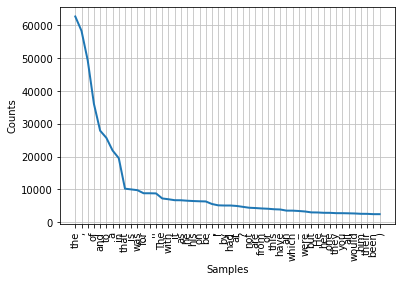

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
uni.plot(50, cumulative=False)

In [16]:
nltk.WordNetLemmatizer().lemmatize("women")

'woman'

## In the real world

Take a look at [spaCy pipelines](https://spacy.io/usage/processing-pipelines), an excellent choice for real-world applications.

---